## ARMA Modeling: Unit Root Testing

**Functions**

`sm.tsa.stattools.adfuller`, `arch.unitroot.ADF` 

### Exercise 72
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

In [1]:
import pandas as pd
import pandas_datareader as pdr

# Conservative start date to get all data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

default = aaa["AAA"] - baa["BAA"]
default.name = "Default"

<AxesSubplot:xlabel='DATE'>

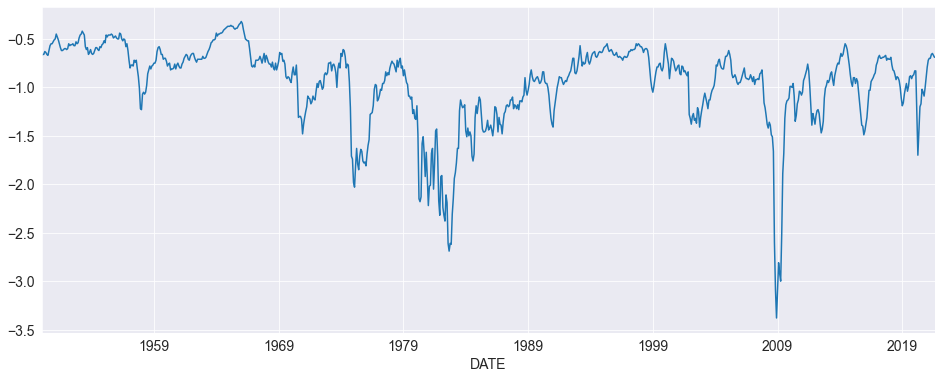

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

default.plot.line()

In [3]:
from arch.unitroot import ADF

adf = ADF(default, trend="ct")
adf.summary()

Test Statistic,-3.713
P-value,0.022
Lags,17


In [4]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     10.03
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           6.71e-27
Time:                        11:06:52   Log-Likelihood:                 772.34
No. Observations:                 842   AIC:                            -1505.
Df Residuals:                     822   BIC:                            -1410.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0362      0.010     -3.713      0.000      -0.055      -0.017
Diff.L1        0.3729      0.035     10.653      0.000       0.304       0.442
Diff.L2       -0.1339      0.037     -3.607      0.000      -0.207      -0.061
Diff.L3        0.0228      0.037      0.609      0.542      -0.051       0.096
Diff.L4       -0.0069      0.037     -0.186      0.853      -0.080       0.066
Diff.L5        0.1283      0.037      3.447      0.001       0.055       0.201
Diff.L6       -0.0417      0.037     -1.115      0.265      -0.115       0.032
Diff.L7       -0.0793      0.037     -2.119      0.034      -0.153      -0.006
Diff.L8       -0.0171      0.037     -0.459      0.647      -0.090       0.056
Diff.L9        0.0643      0.037      1.724      0.085      -0.009       0.138
Diff.L10      -0.0815      0.037     -2.182      0.029      -0.155      -0.008
Diff.L11       0.0497      0.037      1.335      0.182      -0.023       0.123
Diff.L12      -0.0386      0.037     -1.040      0.299      -0.112       0.034
Diff.L13      -0.0400      0.037     -1.079      0.281      -0.113       0.033
Diff.L14       0.0815      0.037      2.195      0.028       0.009       0.154
Diff.L15      -0.0342      0.037     -0.918      0.359      -0.107       0.039
Diff.L16      -0.0765      0.037     -2.063      0.039      -0.149      -0.004
Diff.L17       0.0507      0.036      1.421      0.156      -0.019       0.121
const         -0.0304      0.010     -3.000      0.003      -0.050      -0.010
trend      -1.128e-05   1.46e-05     -0.775      0.438   -3.98e-05    1.73e-05
==============================================================================
Omnibus:                      377.486   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7936.768
Skew:                          -1.521   Prob(JB):                         0.00
Kurtosis:                      17.730   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
adf = ADF(default, trend="c")
adf.summary()

Test Statistic,-3.521
P-value,0.007
Lags,16


In [6]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     11.08
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.66e-27
Time:                        11:06:52   Log-Likelihood:                 772.43
No. Observations:                 843   AIC:                            -1509.
Df Residuals:                     825   BIC:                            -1424.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0325      0.009     -3.521      0.000      -0.051      -0.014
Diff.L1        0.3669      0.035     10.548      0.000       0.299       0.435
Diff.L2       -0.1392      0.037     -3.767      0.000      -0.212      -0.067
Diff.L3        0.0235      0.037      0.632      0.527      -0.050       0.097
Diff.L4       -0.0120      0.037     -0.324      0.746      -0.085       0.061
Diff.L5        0.1234      0.037      3.329      0.001       0.051       0.196
Diff.L6       -0.0425      0.037     -1.138      0.256      -0.116       0.031
Diff.L7       -0.0866      0.037     -2.332      0.020      -0.159      -0.014
Diff.L8       -0.0168      0.037     -0.451      0.652      -0.090       0.056
Diff.L9        0.0607      0.037      1.631      0.103      -0.012       0.134
Diff.L10      -0.0886      0.037     -2.391      0.017      -0.161      -0.016
Diff.L11       0.0448      0.037      1.208      0.228      -0.028       0.118
Diff.L12      -0.0354      0.037     -0.957      0.339      -0.108       0.037
Diff.L13      -0.0425      0.037     -1.146      0.252      -0.115       0.030
Diff.L14       0.0796      0.037      2.146      0.032       0.007       0.152
Diff.L15      -0.0431      0.037     -1.171      0.242      -0.115       0.029
Diff.L16      -0.0603      0.035     -1.720      0.086      -0.129       0.009
const         -0.0316      0.009     -3.332      0.001      -0.050      -0.013
==============================================================================
Omnibus:                      379.647   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8159.630
Skew:                          -1.524   Prob(JB):                         0.00
Kurtosis:                      17.934   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 73

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

<AxesSubplot:xlabel='DATE'>

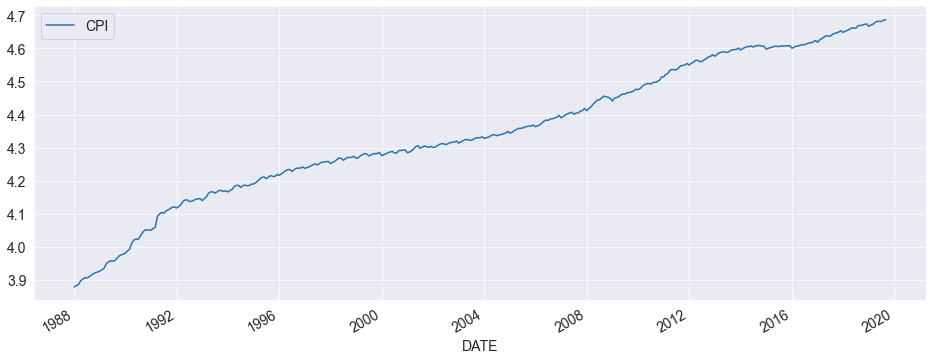

In [7]:
import numpy as np

cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

lncpi.plot.line()

In [8]:
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [9]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.66e-63
Time:                        11:06:53   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import statsmodels.tsa.api as tsa

with_trend = tsa.add_trend(lncpi, trend="ct")
with_trend.head()

,CPI,const,trend
DATE,,,
1988-01-01,3.879397,1.0,1.0
1988-02-01,3.882615,1.0,2.0
1988-03-01,3.886028,1.0,3.0
1988-04-01,3.897518,1.0,4.0
1988-05-01,3.902558,1.0,5.0


<AxesSubplot:xlabel='DATE'>

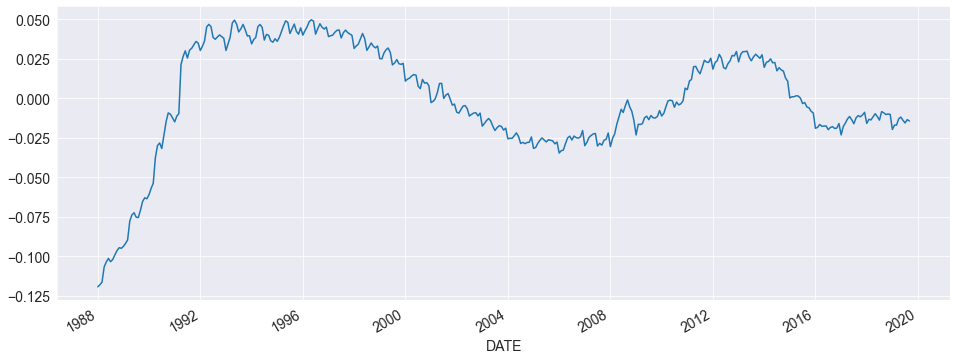

In [11]:
import statsmodels.api as sm

res = sm.OLS(with_trend["CPI"], with_trend[["const", "trend"]]).fit()

plt.rc("figure", figsize=(16, 6))
res.resid.plot.line()